# P set2
## P3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def diff_2d(deltax=0.025,deltay=0.025,deltat=0.0125,gridt=1000,difftype="origin"):
    # initial domain

    domainlx = 1.    # diff区域
    domainly = 1.
    # deltax   = 0.025
    # deltay   = 0.025 
    # deltat   = 0.0125 # 根据CR数确定
    # gridt    = 1000
    gridnx   = int(domainlx / deltax) + 1 # grids number x 
    gridny   = int(domainlx / deltax) + 1 # grids number y
    print("积分时间长度:", gridt*deltat,"s")

    # initial
    c = np.zeros([gridnx,gridny,gridt])
    print("check output c shape[nx,ny,nt]: ",c.shape)
    r = np.empty(c.shape[0:2])
    for ix in range(0, gridnx):
        for iy in range(0, gridny):
            r[ix,iy] = min([4 * np.sqrt( (deltax*ix-1/2)**2 + (deltay*iy-1/2)**2), 1])
            c[ix,iy,0] = 1/2*(1+np.cos(np.pi*r[ix,iy])) 
    # print([ix,iy,gridnx,gridny])
    # print(r)

    ux = 1.  # advection volicity
    uy = 1.
    cr_x = ux*deltat/deltax
    cr_y = uy*deltat/deltay
    print("check cr_x = ",cr_x, " cr_y", cr_y)
    if(difftype=="origin"):
        for it in range(0, gridt-1):
            # periodic codition
            c[:,0,it] = c[:,gridny-1,it]  
            c[0,:,it] = c[gridnx-1,:,it]
            # c[:,1,it] = c[:,gridny-1,it]  
            # c[1,:,it] = c[gridnx-1,:,it] 

            for ix in range(1, gridnx):
                for iy in range(1, gridny):
                    # 2D diff
                    c[ix, iy, it+1] = c[ix, iy, it] - cr_x * ( c[ix, iy, it] - c[ix-1, iy, it] ) - cr_y *( c[ix,iy,it] - c[ix, iy - 1, it] )
    
    if(difftype=="fixed"):
        for it in range(0, gridt-1):
            # periodic codition
            odd_or_even = 1;
            c[:,0,it] = c[:,gridny-1,it]  
            c[0,:,it] = c[gridnx-1,:,it]
            # c[:,1,it] = c[:,gridny-1,it]  
            # c[1,:,it] = c[gridnx-1,:,it]
            change_phase = 0 
            for ix in range(1, gridnx):
                for iy in range(1, gridny):
                    # 2D diff
                    if(odd_or_even==1):
                        c[ix, iy, it+1] = c[ix, iy, it] - cr_y * ( c[ix, iy, it] - c[ix, iy - 1, it])
                        c[ix, iy, it+1] = c[ix, iy, it] - cr_y * ( c[ix, iy, it] - c[ix, iy - 1, it])
                        odd_or_even=-1
                    if(odd_or_even==-1):
                        c[ix, iy, it+1] = c[ix, iy, it] - cr_y * ( c[ix, iy, it] - c[ix, iy - 1, it])
                        c[ix, iy, it+1] = c[ix, iy, it] - cr_x * ( c[ix, iy, it] - c[ix - 1, iy, it]) 
                        odd_or_even= 1

    return c;


In [25]:
# 初始状况绘图
domainlx = 1.    # diff区域
domainly = 1.
deltax   = 0.025
deltay   = 0.025 
# deltat   = 0.025 # 根据CR数确定
deltat   = 0.0125 # 根据CR数确定
gridnx   = int(domainlx / deltax) + 1 # grids number x 
gridny   = int(domainlx / deltax) + 1 # grids number y
c = diff_2d(deltax=deltax,deltay=deltay,deltat=deltat,difftype='fixed')

积分时间长度: 12.5 s
check output c shape[nx,ny,nt]:  (41, 41, 1000)
check cr_x =  0.5  cr_y 0.5


# b
<br>绘制1s时的数值结果，cr_x = cr_y = 0.5

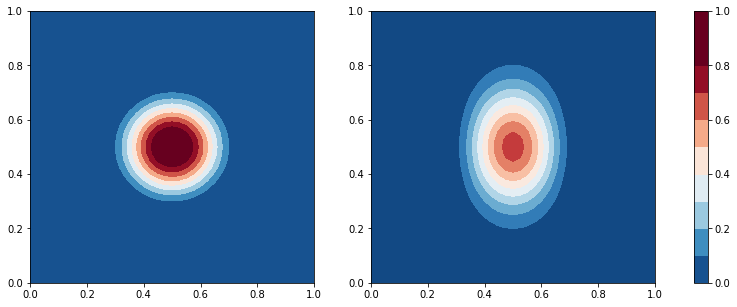

In [26]:
import matplotlib
fig,ax = plt.subplots(1,2,figsize=(14,5))
# custom_zlim = (0, 2.0)
# plt.setp(ax, zlim=custom_zlim, ylim=custom_ylim)
norm = matplotlib.colors.Normalize(vmin=0, vmax=3.)

ax0 = ax[0].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,0],levels = 10,cmap="RdBu_r", norm = norm,vmin=0,vmax=0.8,level=6)
ax1 = ax[1].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,int(1./deltat)],levels = 10,cmap="RdBu_r",norm = norm,vmin=0,vmax=0.8,level=6)
# im = ax.imshow(data, cmap='bone')
# im.clim(vmin=0,vmax=2)
# plt.colorbar(ax0,ax=ax)
plt.colorbar(ax0,ax=ax.ravel().tolist())
# plt.clim(0,2)

## b
<br>绘制1s时的

In [6]:
# fig,ax = plt.subplots(1,figsize=(8,6))
# ax1 = ax.contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,5*i],levels = 10,cmap="RdBu_r")
    

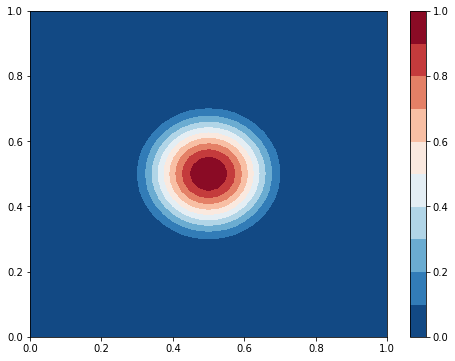

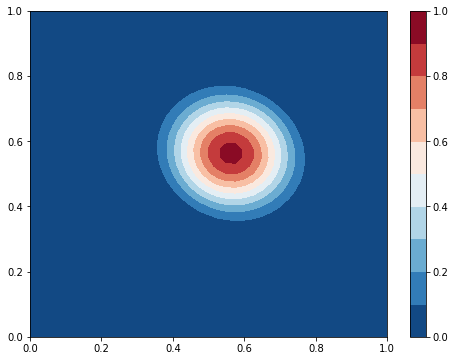

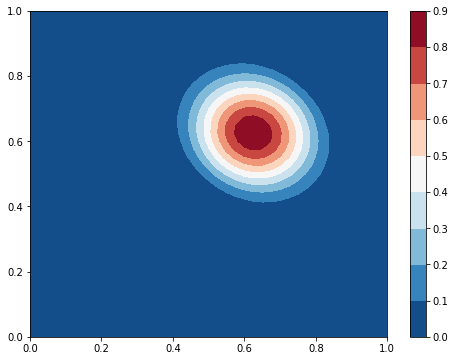

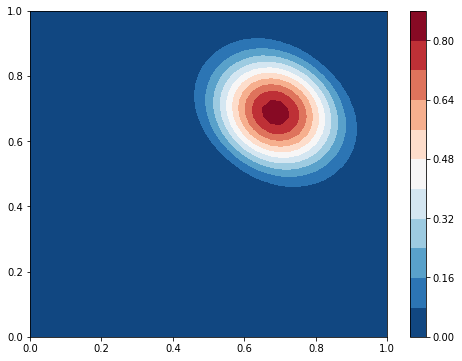

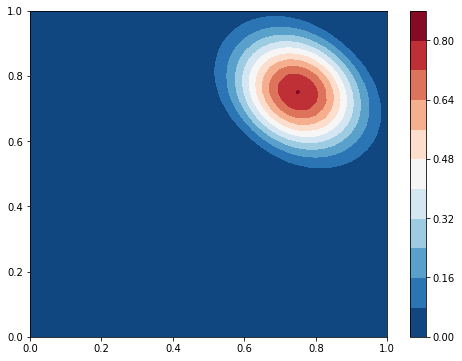

In [5]:
# 用于批量画图产生GIF
for i in range(0,5):
    fig,ax = plt.subplots(1,figsize=(8,6))
    ax1 = ax.contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,5*i],levels = 10,cmap="RdBu_r")
    plt.colorbar(ax1,ax=ax)
    plt.savefig("./test3_output/test"+str(i)+".png")